**Fish Weight Prediction**

**Import Library**

In [65]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

**Import Data**

In [66]:
fish = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Fish.csv')
fish.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


**Describe Data**

In [67]:
fish.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


**Data Visualization**

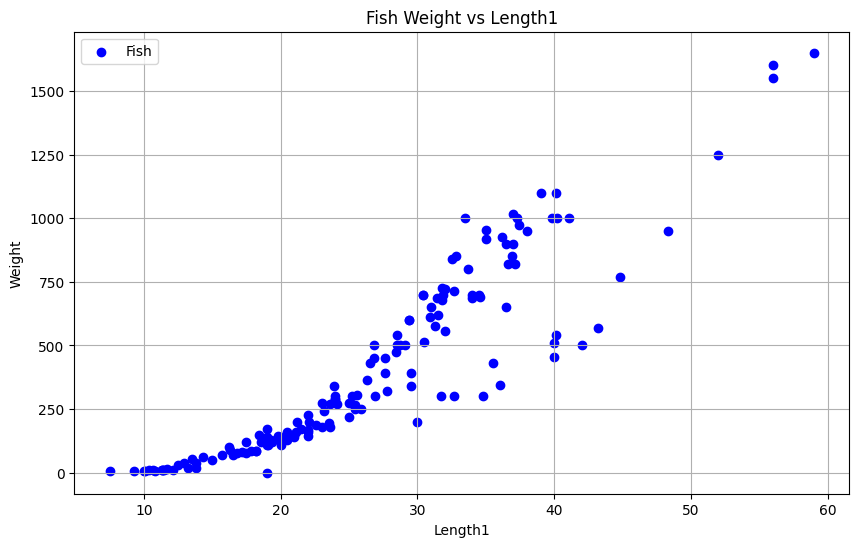

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(fish['Length1'], fish['Weight'], c='blue', label='Fish')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Fish Weight vs Length1')
plt.legend()
plt.grid(True)
plt.show()

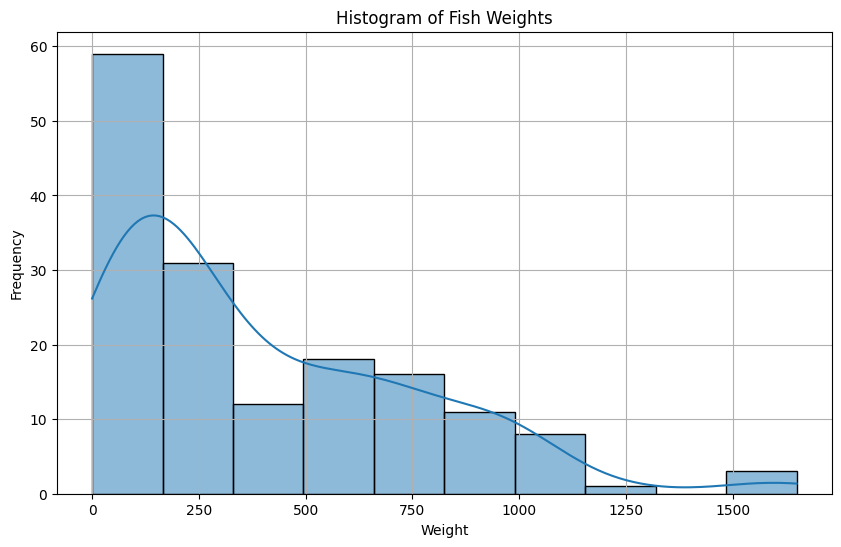

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(fish['Weight'], bins=10, kde=True)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Fish Weights')
plt.grid(True)
plt.show()

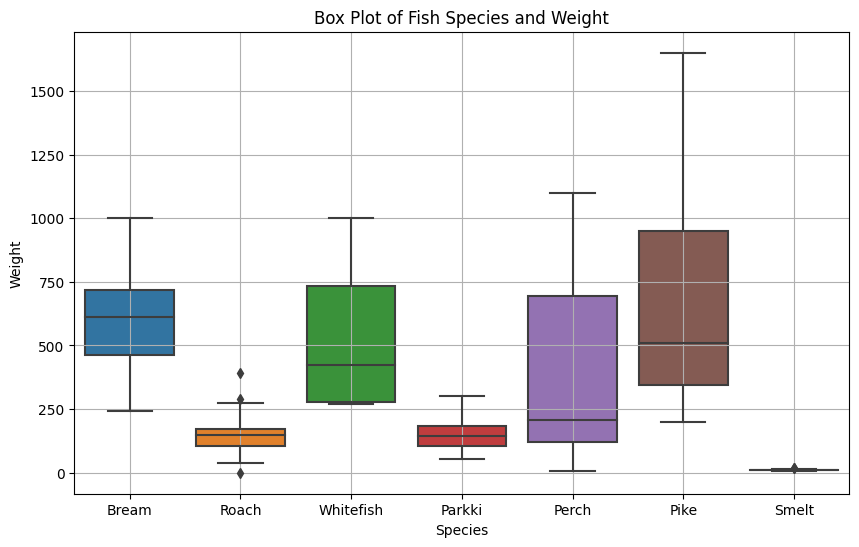

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='Weight', data=fish)
plt.xlabel('Species')
plt.ylabel('Weight')
plt.title('Box Plot of Fish Species and Weight')
plt.grid(True)
plt.show()

**Data Preprocessing**

In [71]:
encoded_species = pd.get_dummies(fish['Species'], prefix='Species')
fish_encoded = pd.concat([fish, encoded_species], axis=1)
fish_encoded.drop('Species', axis=1, inplace=True)

In [72]:
fish_encoded.columns

Index(['Category', 'Weight', 'Height', 'Width', 'Length1', 'Length2',
       'Length3', 'Species_Bream', 'Species_Parkki', 'Species_Perch',
       'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [73]:
fish_encoded.head()

,Category,Weight,Height,Width,Length1,Length2,Length3,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,1,242.0,11.5200,4.0200,23.2,25.4,30.0,1,0,0,0,0,0,0
1,1,290.0,12.4800,4.3056,24.0,26.3,31.2,1,0,0,0,0,0,0
2,1,340.0,12.3778,4.6961,23.9,26.5,31.1,1,0,0,0,0,0,0
3,1,363.0,12.7300,4.4555,26.3,29.0,33.5,1,0,0,0,0,0,0
4,1,430.0,12.4440,5.1340,26.5,29.0,34.0,1,0,0,0,0,0,0


**Target Variable (y) and Feature Variables (X)**

In [74]:
y=fish_encoded['Weight']
x=fish_encoded.drop("Weight", axis='columns')

**Train Test Split**

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=2529)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((111, 13), (48, 13), (111,), (48,))

**Modeling**

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [78]:
model.fit(X_train,y_train)


LinearRegression()

**Model Evaluation**

In [79]:
y_pred = model.predict(X_test)
y_pred

array([ 480.40777664,  543.85613898,   74.17907183,  733.04717931,
        191.24999767,  279.26919748,  336.83934348,  367.36976441,
        434.83214141,  -16.98385007,   28.52955694,  461.79027286,
        155.76494974,  765.13394222,  394.98538615,  295.62604342,
        544.40884552,  172.70330688,  405.44183083,   53.82295852,
         95.54128077, -155.93272879,  442.76225795,  763.84698884,
        870.20411922,  -41.96037881,  371.70850109,  746.33605627,
        325.80602358,  822.48703844,  482.04938401,  537.25410922,
        273.70858696,  600.03325242,  -41.5530351 ,  966.57818965,
        865.31620962,  174.25552993,  269.53410014,  912.00746774,
        702.83268149,  999.69148907,  631.67031796,  627.15713942,
        532.66745915,  282.84633715,  518.39104971,  123.30808788])

**Prediction**

In [80]:

r2_score(y_test,y_pred)

0.9124587540890843

Problem Statement:
The goal of my model is to predict the weight of a fish based on certain attributes like its species, height, width, and length measurements.

Steps to Build the Model:

Data Preparation:

Load the dataset containing fish attributes including species, height, width, and length measurements.
Preprocess the data by handling any missing values, outliers, or data inconsistencies.
Feature Selection:

Choose the relevant features (attributes) that can contribute to predicting the fish weight.
In your case, you may use features like 'Species', 'Height', 'Width', 'Length1', 'Length2', and 'Length3'.
One-Hot Encoding:

Convert categorical data like the 'Species' column into numerical format using one-hot encoding, as shown in the previous examples.
This is necessary because most machine learning algorithms require numerical input.
Data Splitting:

Split your dataset into training and testing sets.
The training set is used to train the model, and the testing set is used to evaluate its performance.
Model Selection:

Choose a suitable machine learning algorithm for regression tasks.
Common choices include linear regression, decision trees, random forests, gradient boosting, and neural networks.
Model Training:

Train the selected model using the training data.
The model will learn the patterns in the data that relate the input attributes to the fish weight.
Model Evaluation:

Evaluate the trained model's performance using the testing data.
Common evaluation metrics for regression tasks include mean squared error (MSE), root mean squared error (RMSE), and R-squared.
